In [80]:
from config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import requests
import json
pd.options.mode.chained_assignment = None

In [6]:
BASE_URL = 'https://www.alphavantage.co/query?'
BITCOIN_URL = "{}function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=CNY&apikey={}".format(
    BASE_URL, ALPHA_VANTAGE_API_KEY)

In [7]:
def get_bitcoin():
    r = requests.get(BITCOIN_URL)
    return json.loads(r.content)

In [14]:
response = get_bitcoin()
df = pd.DataFrame(response)
df.to_excel('bitcoin-data.xlsx', sheet_name='bitcoin-daily-price')

In [58]:
df = pd.read_excel('bitcoin-data.xlsx')

In [59]:
df.head()

,Unnamed: 0,Meta Data,Time Series (Digital Currency Daily)
0,1. Information,Daily Prices and Volumes for Digital Currency,NaN
1,2. Digital Currency Code,BTC,NaN
2,3. Digital Currency Name,Bitcoin,NaN
3,4. Market Code,CNY,NaN
4,5. Market Name,Chinese Yuan,NaN


In [60]:
print(response['Time Series (Digital Currency Daily)'])

{'2021-07-26': {'1a. open (CNY)': '229325.61923200', '1b. open (USD)': '35381.02000000', '2a. high (CNY)': '257643.60000000', '2b. high (USD)': '39750.00000000', '3a. low (CNY)': '228189.78364800', '3b. low (USD)': '35205.78000000', '4a. close (CNY)': '257012.22734400', '4b. close (USD)': '39652.59000000', '5. volume': '15497.33542200', '6. market cap (USD)': '15497.33542200'}, '2021-07-25': {'1a. open (CNY)': '222069.40321600', '1b. open (USD)': '34261.51000000', '2a. high (CNY)': '229435.67680000', '2b. high (USD)': '35398.00000000', '3a. low (CNY)': '219409.41939200', '3b. low (USD)': '33851.12000000', '4a. close (CNY)': '229325.61923200', '4b. close (USD)': '35381.02000000', '5. volume': '47852.92831300', '6. market cap (USD)': '47852.92831300'}, '2021-07-24': {'1a. open (CNY)': '218002.78256000', '1b. open (USD)': '33634.10000000', '2a. high (CNY)': '223615.20000000', '2b. high (USD)': '34500.00000000', '3a. low (CNY)': '216492.82902400', '3b. low (USD)': '33401.14000000', '4a. cl

In [61]:
df_1 = pd.DataFrame(response['Time Series (Digital Currency Daily)']).transpose()

In [62]:
df_1.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2021-07-26,229325.61923200,35381.02000000,257643.60000000,39750.00000000,228189.78364800,35205.78000000,257012.22734400,39652.59000000,15497.33542200,15497.33542200
2021-07-25,222069.40321600,34261.51000000,229435.67680000,35398.00000000,219409.41939200,33851.12000000,229325.61923200,35381.02000000,47852.92831300,47852.92831300
2021-07-24,218002.78256000,33634.10000000,223615.20000000,34500.00000000,216492.82902400,33401.14000000,222047.56022400,34258.14000000,47977.55013800,47977.55013800
2021-07-23,209275.17852800,32287.58000000,218105.84000000,33650.00000000,206920.67251200,31924.32000000,218002.71774400,33634.09000000,50112.86362600,50112.86362600
2021-07-22,208347.85601600,32144.51000000,211244.09416000,32591.35000000,205518.57280000,31708.00000000,209276.79892800,32287.83000000,46148.09243300,46148.09243300


In [63]:
df_1['4b. close (USD)'].iloc[0]

'39652.59000000'

In [64]:
df_1 = df_1.apply(pd.to_numeric)

In [65]:
df_1['4b. close (USD)'].iloc[0]

39652.59

<AxesSubplot:>

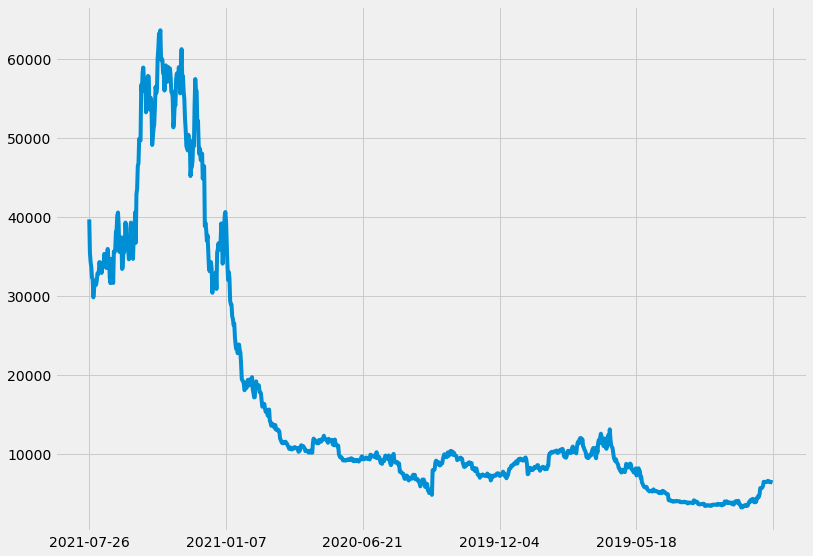

In [66]:
df_1['4b. close (USD)'].plot(figsize=(12,9))

In [67]:
# reverse the dataframe so the dates are in ascending order
df = df_1.iloc[::-1]

In [68]:
df_1.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2021-07-26,229325.619232,35381.02,257643.60000,39750.00,228189.783648,35205.78,257012.227344,39652.59,15497.335422,15497.335422
2021-07-25,222069.403216,34261.51,229435.67680,35398.00,219409.419392,33851.12,229325.619232,35381.02,47852.928313,47852.928313
2021-07-24,218002.782560,33634.10,223615.20000,34500.00,216492.829024,33401.14,222047.560224,34258.14,47977.550138,47977.550138
2021-07-23,209275.178528,32287.58,218105.84000,33650.00,206920.672512,31924.32,218002.717744,33634.09,50112.863626,50112.863626
2021-07-22,208347.856016,32144.51,211244.09416,32591.35,205518.572800,31708.00,209276.798928,32287.83,46148.092433,46148.092433


<AxesSubplot:>

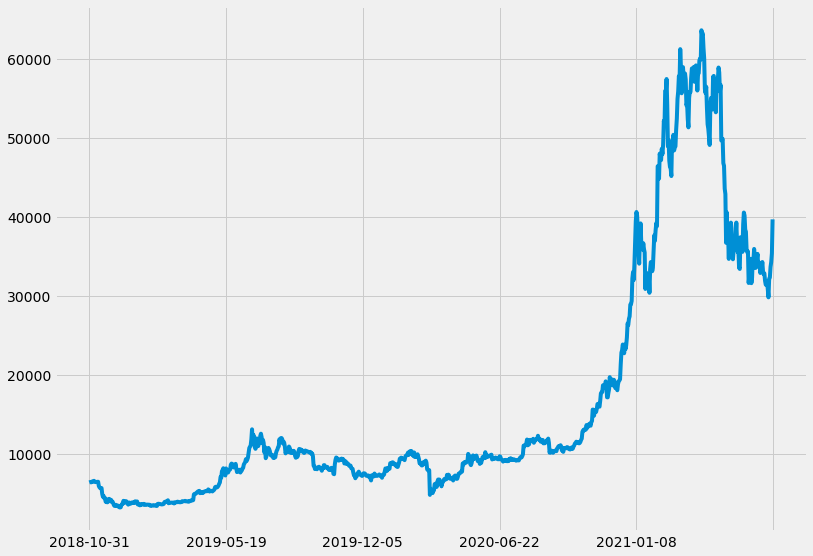

In [72]:
df['4b. close (USD)'].plot(figsize=(12,9))

In [77]:
# Function to create sma
def create_sma(duration, price, df_input, indicator_list_input, name):
    col_name = 'SMA_' + str(duration) + '_' + name
    indicator_list_input.append(col_name)
    df_input[col_name] = df_input[price].rolling(duration, min_periods=1).mean()

In [106]:
def sma_backtest(indicator, cash, days, compare_price, start_range, df_input):
    buy_cash = 0
    status = False
    trade_data = []
    number_of_shares = 0
    ind_arr = indicator.split('_')
    # start_range = int(ind_arr[1])
    end_range = start_range + days
    for i in range(start_range, end_range):
        date = df_input.iloc[i].name
         # At the end sell all positions and update remaining cash
        if i == end_range - 1:
            if status == True:
                cash = number_of_shares * df_input.iloc[i+1]['1b. open (USD)']
                status = False
                number_of_shares = 0
                trade_data.append({'type': 'sell', 'price': df_input.iloc[i+1]['1b. open (USD)'], 'cash': cash, 'shares': number_of_shares, 'profit': cash - buy_cash, 'percent_change': round((cash - buy_cash) / buy_cash, 2) * 100,'indicator': indicator, 'date': date})
                break
            else:
                trade_data.append({'type': 'hold', 'price': 0, 'cash': buy_cash, 'shares': 0, 'profit': 0, 'percent_change': 0,'indicator': indicator, 'date': date})
                break
                
        # Check if close is above moving average
        if df_input.iloc[i][compare_price] > df_input.iloc[i][indicator]:
            # If the close is above either buy or hold the security
            if status == False:
                # Buy the stock with the cash
                number_of_shares = cash / df_input.iloc[i+1]['1b. open (USD)']
                buy_cash = cash
                cash = 0
                status = True
                trade_data.append({'type': 'buy', 'price': df_input.iloc[i+1]['1b. open (USD)'], 'cash': cash, 'shares': number_of_shares, 'profit': 0, 'percent_change': 0,'indicator': indicator, 'date': date })
        if df_input.iloc[i][compare_price] < df_input.iloc[i][indicator]:
            if status == True:
                cash = number_of_shares * df_input.iloc[i+1]['1b. open (USD)']
                status = False
                number_of_shares = 0
                trade_data.append({'type': 'sell', 'price': df_input.iloc[i+1]['1b. open (USD)'], 'cash': cash, 'shares': number_of_shares, 'profit': cash - buy_cash, 'percent_change': round((cash - buy_cash) / buy_cash, 2) * 100,'indicator': indicator, 'date': date})

       
    return pd.DataFrame(trade_data)

In [137]:
# Hold all indicators in list (list of strings)
indicator_list = []
# Loop through SMA function to create multiple SMAs
for i in range(1, 60):
    create_sma(i, '3b. low (USD)', df, indicator_list, 'low')
    create_sma(i, '2b. high (USD)', df, indicator_list, 'high')
    create_sma(i, '4b. close (USD)', df, indicator_list, 'close')

In [138]:
df.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD),...,SMA_57_low,SMA_57_high,SMA_57_close,SMA_58_low,SMA_58_high,SMA_58_close,SMA_59_low,SMA_59_high,SMA_59_close,sma_low
2018-10-31,41028.592816,6330.01,41663.724800,6428.00,40477.721632,6245.02,41300.301488,6371.93,12148.888216,12148.888216,...,6245.020000,6428.000000,6371.930000,6245.020000,6428.000000,6371.930000,6245.020000,6428.000000,6371.930000,6245.020000
2018-11-01,41284.680832,6369.52,41758.680240,6442.65,41149.474656,6348.66,41547.056000,6410.00,9099.035841,9099.035841,...,6296.840000,6435.325000,6390.965000,6296.840000,6435.325000,6390.965000,6296.840000,6435.325000,6390.965000,6296.840000
2018-11-02,41547.056000,6410.00,41873.339744,6460.34,41405.757120,6388.20,41702.484768,6433.98,9739.440679,9739.440679,...,6327.293333,6443.663333,6405.303333,6327.293333,6443.663333,6405.303333,6327.293333,6443.663333,6405.303333,6327.293333
2018-11-03,41694.836480,6432.80,41741.309552,6439.97,41125.752000,6345.00,41398.562544,6387.09,7661.241476,7661.241476,...,6331.720000,6442.740000,6400.750000,6331.720000,6442.740000,6400.750000,6331.720000,6442.740000,6400.750000,6331.720000
2018-11-04,41404.460800,6388.00,42292.440000,6525.00,41216.494400,6359.00,42038.685360,6485.85,10592.394943,10592.394943,...,6337.176000,6459.192000,6417.770000,6337.176000,6459.192000,6417.770000,6337.176000,6459.192000,6417.770000,6337.176000


In [139]:
df_backtest = pd.DataFrame(columns=['type', 'price', 'cash', 'shares', 'profit', 'indicator', 'date'])
for i in indicator_list:
    df_backtest = pd.concat([df_backtest, sma_backtest(i, 1000, 400, '4b. close (USD)', 65, df)]) 

In [140]:
df_backtest.head(30)

,type,price,cash,shares,profit,indicator,date,percent_change
0,buy,3790.09,0.000000,0.263846,0.000000,SMA_1_low,2019-01-04,0.0
1,sell,9813.87,2589.350121,0.000000,1589.350121,SMA_1_low,2020-02-07,159.0
0,hold,0.00,0.000000,0.000000,0.000000,SMA_1_high,2020-02-07,0.0
0,buy,3790.09,0.000000,0.263846,0.000000,SMA_1_close,2019-01-04,0.0
1,sell,3569.07,941.684762,0.000000,-58.315238,SMA_1_close,2019-01-24,-6.0
2,buy,3434.00,0.000000,0.274224,0.000000,SMA_1_close,2019-01-28,0.0
3,sell,3897.35,1068.746391,0.000000,127.061629,SMA_1_close,2019-02-18,13.0
4,buy,3866.00,0.000000,0.276448,0.000000,SMA_1_close,2019-03-13,0.0
5,sell,4006.01,1107.451819,0.000000,38.705427,SMA_1_close,2019-03-23,4.0
6,buy,5170.27,0.000000,0.214196,0.000000,SMA_1_close,2019-04-07,0.0


In [141]:
# df_backtest.loc[df_backtest.sort_values(by='date').index[-1]].sort_values(by=['cash'], ascending=False).head(30)
df_backtest[df_backtest.sort_values(by='date').iloc[-1]['date'] == df_backtest['date']].sort_values(by=['cash'], ascending=False).head(30)

,type,price,cash,shares,profit,indicator,date,percent_change
35,sell,9813.87,2925.440214,0.0,735.951422,SMA_22_close,2020-02-07,34.0
31,sell,9813.87,2886.849806,0.0,726.243254,SMA_23_close,2020-02-07,34.0
31,sell,9813.87,2877.140044,0.0,723.800574,SMA_24_close,2020-02-07,34.0
29,sell,9813.87,2842.287352,0.0,715.032701,SMA_26_high,2020-02-07,34.0
25,sell,9813.87,2805.842764,0.0,702.250506,SMA_29_high,2020-02-07,33.0
37,sell,9813.87,2799.545520,0.0,342.168672,SMA_21_high,2020-02-07,14.0
41,sell,9813.87,2785.351768,0.0,340.433869,SMA_16_close,2020-02-07,14.0
41,sell,9813.87,2783.641513,0.0,340.224837,SMA_17_close,2020-02-07,14.0
37,sell,9813.87,2782.297550,0.0,340.060574,SMA_23_high,2020-02-07,14.0
39,sell,9813.87,2766.207249,0.0,338.093970,SMA_21_close,2020-02-07,14.0
